In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
url = requests.get("https://en.wikipedia.org/wiki/List_of_postcode_districts_in_the_United_Kingdom").text
soup = BeautifulSoup(url,'lxml')
#print(soup.prettify())
from IPython.display import HTML, display

In [2]:
def trim(dataset):
    """Remove white space from strings in Pandas dataframe"""
    trim = lambda x: x.strip() if type(x) is str else x #strip() method removes white space from string.
    return dataset.applymap(trim) #Apply a function to a Dataframe elementwise.

In [3]:
myTable = soup.find('table',{'class':'wikitable sortable'})

In [4]:
titles = []
for title in myTable.findAll('th'):
    titles.append(title.text)
print(titles)

['Postcode area\n', 'Postcode districts\n', 'Post town\n', 'Former postal county\n']


In [5]:
rowlen = len(myTable.findAll('tr'))
print(rowlen)

1503


In [6]:
rowlen = len(myTable.findAll('tr'))
df = pd.DataFrame(index=np.arange(0,rowlen+1,1),columns=list(titles))
row_marker = 0
for row in myTable.findAll('tr'): #rows in tr
    column_marker = 0
    columns = row.findAll('td') # columns in td
    for column in columns:
        df.iat[row_marker,column_marker] = column.get_text() #iat returns value from row and col position
        column_marker +=1
    row_marker +=1

df.head()


,Postcode area,Postcode districts,Post town,Former postal county
0,NaN,NaN,NaN,NaN
1,AB\n,"AB10, AB11, AB12, AB15, AB16, AB21, AB22, AB23...",Aberdeen\n,(Aberdeenshire)\n
2,AB\n,AB13\n,Milltimber\n,Aberdeenshire\n
3,AB\n,AB14\n,Peterculter\n,Aberdeenshire\n
4,AB\n,AB30\n,Laurencekirk\n,Kincardineshire\n


In [7]:
df.dropna(axis = 0,inplace=True)
df = df.replace('\n','',regex=True)
df.head()

,Postcode area,Postcode districts,Post town,Former postal county
1,AB,"AB10, AB11, AB12, AB15, AB16, AB21, AB22, AB23...",Aberdeen,(Aberdeenshire)
2,AB,AB13,Milltimber,Aberdeenshire
3,AB,AB14,Peterculter,Aberdeenshire
4,AB,AB30,Laurencekirk,Kincardineshire
5,AB,AB31,Banchory,Kincardineshire


In [8]:
df = df.replace('non-geo','',regex=True)

In [9]:
df.describe()

,Postcode area,Postcode districts,Post town,Former postal county
count,1502,1502,1502,1502
unique,126,1446,1483,183
top,LL,GL17shared,LONDON,Surrey
freq,62,5,8,54


In [10]:
columns = ["Postcode area","Postcode districts","Post town","Former postal county"]
renamedict =  dict(zip(titles, columns)) #zip to build dict from 2 lists
for x,y in renamedict.items():
    df.rename(columns={x:y},inplace = True)

In [11]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [12]:
df2 = df.loc[(df["Former postal county"]=="(london)") | (df["Former postal county"] == "west midlands") | (df["Former postal county"] == "(west midlands)")]

In [13]:
df2 = df2.replace("shared","",regex = True)

In [14]:
df2.drop(columns = "Postcode area",inplace=True)

In [15]:
df2.head()

,Postcode districts,Post town,Former postal county
30,"b001 b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, ...",birmingham,(west midlands)
33,"b062 b62, b63",halesowen,west midlands
34,b064 b64,cradley heath,west midlands
35,b065 b65,rowley regis,west midlands
36,"b066 b66, b67",smethwick,west midlands


In [16]:
words = []
for pCode in df2["Postcode districts"]:
    words.append(pCode.split(" "))

In [17]:
df2 = trim(df2)

In [18]:
df2

,Postcode districts,Post town,Former postal county
30,"b001 b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, ...",birmingham,(west midlands)
33,"b062 b62, b63",halesowen,west midlands
34,b064 b64,cradley heath,west midlands
35,b065 b65,rowley regis,west midlands
36,"b066 b66, b67",smethwick,west midlands
37,"b068 b68, b69",oldbury,west midlands
38,"b070 b70, b71",west bromwich,west midlands
39,"b072 b72, b73, b74, b75, b76",sutton coldfield,west midlands
42,"b090 b90, b91, b92, b93, b94",solihull,west midlands
43,b095 b95,henley-in-arden,west midlands


In [3]:
def flatten(lists):
    '''Flatten nested lists into single list'''
    flist=[]
    for l in lists:
            for z in l:
                try:
                    #print(z)
                    if z[-1] == ',':
                        z = z[0:len(z)-1] #remove , from end of string if present
                        flist.append(z)
                    else:
                        flist.append(z)
                except:
                    continue
    print(flist)
    return (flist)
            

In [4]:
def flatten2(x):
    '''Flattens nested lists into a single list'''
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str): #hasattr function checks if object has a specific attribute
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [21]:
flist = flatten(words)

['b001', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36', 'b37', 'b38', 'b40', 'b42', 'b43', 'b44', 'b45', 'b46', 'b47', 'b48,b99', 'b062', 'b62', 'b63', 'b064', 'b64', 'b065', 'b65', 'b066', 'b66', 'b67', 'b068', 'b68', 'b69', 'b070', 'b70', 'b71', 'b072', 'b72', 'b73', 'b74', 'b75', 'b76', 'b090', 'b90', 'b91', 'b92', 'b93', 'b94', 'b095', 'b95', 'cv01', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5', 'cv6', 'cv7', 'cv8', 'dy01', 'dy1', 'dy2', 'dy3', 'dy04', 'dy4', 'dy05', 'dy5', 'dy06', 'dy6', 'dy07', 'dy7', 'dy8', 'dy9', 'e001', 'e1', 'e1w', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e20', 'e77', 'e98', 'ec01', 'ec1a', 'ec1m', 'ec1n', 'ec1p', 'ec1r', 'ec1v', 'ec1y', 'ec2a', 'ec2m', 'ec2n', 'ec2p', 'ec2r', 'ec2v', 'ec2y', 'ec3a', 'ec3m', 'ec3n'

In [22]:
for i in flist:
    if i[-1] == "]":
        flist.remove(i)
print(flist)

['b001', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36', 'b37', 'b38', 'b40', 'b42', 'b43', 'b44', 'b45', 'b46', 'b47', 'b48,b99', 'b062', 'b62', 'b63', 'b064', 'b64', 'b065', 'b65', 'b066', 'b66', 'b67', 'b068', 'b68', 'b69', 'b070', 'b70', 'b71', 'b072', 'b72', 'b73', 'b74', 'b75', 'b76', 'b090', 'b90', 'b91', 'b92', 'b93', 'b94', 'b095', 'b95', 'cv01', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5', 'cv6', 'cv7', 'cv8', 'dy01', 'dy1', 'dy2', 'dy3', 'dy04', 'dy4', 'dy05', 'dy5', 'dy06', 'dy6', 'dy07', 'dy7', 'dy8', 'dy9', 'e001', 'e1', 'e1w', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e20', 'e77', 'e98', 'ec01', 'ec1a', 'ec1m', 'ec1n', 'ec1p', 'ec1r', 'ec1v', 'ec1y', 'ec2a', 'ec2m', 'ec2n', 'ec2p', 'ec2r', 'ec2v', 'ec2y', 'ec3a', 'ec3m', 'ec3n'

In [23]:
#test
from geopy.geocoders import Nominatim
address = 'NG1, United Kingdom'
geolocator = Nominatim(user_agent="UK_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of NG1 are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of NG1 are 52.9540117, -1.1379988.


In [24]:
Lat = []
Long = []
badPcode=[]
for postcode in flist:
    address = ('{},United Kingdom').format(postcode)
    geolocator = Nominatim(timeout=100,user_agent="UK_explorer")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        print (postcode)
        badPcode.append(address) #note which postcodes dont return coordinates to remove from postcode list
    Lat.append(latitude)
    Long.append(longitude)

b001
b062
b064
b065
b068
b070
b072
b090
b095
cv01
dy01
dy04
dy05
dy06
dy07
e001
ec01
ec1p
ec2n
ec2p
ec3a
ec3p
ec4p
n001
n1p
nw01
nw26
se01
se1p
se28
sw01
sw95
w001
w1a
w1c
w1f
w1g
wc01
ws01
wv01
wv7
wv98
wv01
wv12


In [25]:
for x in badPcode:
    if x in flist:
        flist.remove(x)

In [36]:
print(flist)

['b001', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36', 'b37', 'b38', 'b40', 'b42', 'b43', 'b44', 'b45', 'b46', 'b47', 'b48,b99', 'b062', 'b62', 'b63', 'b064', 'b64', 'b065', 'b65', 'b066', 'b66', 'b67', 'b068', 'b68', 'b69', 'b070', 'b70', 'b71', 'b072', 'b72', 'b73', 'b74', 'b75', 'b76', 'b090', 'b90', 'b91', 'b92', 'b93', 'b94', 'b095', 'b95', 'cv01', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5', 'cv6', 'cv7', 'cv8', 'dy01', 'dy1', 'dy2', 'dy3', 'dy04', 'dy4', 'dy05', 'dy5', 'dy06', 'dy6', 'dy07', 'dy7', 'dy8', 'dy9', 'e001', 'e1', 'e1w', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e20', 'e77', 'e98', 'ec01', 'ec1a', 'ec1m', 'ec1n', 'ec1p', 'ec1r', 'ec1v', 'ec1y', 'ec2a', 'ec2m', 'ec2n', 'ec2p', 'ec2r', 'ec2v', 'ec2y', 'ec3a', 'ec3m', 'ec3n'

In [37]:
print(len(flist),len(Lat),len(Long)) #check all 3 lists are the same size

319 319 319


In [38]:
df3 = pd.DataFrame({"PostCode":flist,"Latitude":Lat,"Longitude":Long})

In [39]:
df3.query('PostCode.str.contains("b")', engine='python')

,PostCode,Latitude,Longitude
0,b001,52.954012,-1.137999
1,b1,53.352154,-2.281967
2,b2,54.502721,-6.470794
3,b3,54.321488,-6.319656
4,b4,54.595074,-7.268807
5,b5,51.095956,1.132650
6,b6,52.504462,-1.884915
7,b7,52.492545,-1.874790
8,b8,54.181240,-6.299130
9,b9,54.439753,-6.268239


In [40]:
df2.rename(columns={"Postcode districts":"Postcode"},inplace=True)

In [41]:
df3.drop(index = 0,inplace=True)

In [42]:
df3.query('PostCode.str.contains("b")', engine='python')

,PostCode,Latitude,Longitude
1,b1,53.352154,-2.281967
2,b2,54.502721,-6.470794
3,b3,54.321488,-6.319656
4,b4,54.595074,-7.268807
5,b5,51.095956,1.132650
6,b6,52.504462,-1.884915
7,b7,52.492545,-1.874790
8,b8,54.181240,-6.299130
9,b9,54.439753,-6.268239
10,b10,52.469176,-1.854657


In [3]:
from pandas.io.json import json_normalize
import folium
print("Done")

Done


In [4]:
CLIENT_ID = '###########################' # your Foursquare ID
CLIENT_SECRET = '#################################' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###################
CLIENT_SECRET:#################


In [46]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c8b7943dd57973aafbcf8ab'},
 'response': {'venues': [{'id': '51fbc234498e8e687a0bd0ab',
    'name': 'Gateway Coffee Shop',
    'location': {'lat': 52.254346,
     'lng': -1.387256,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.254346,
       'lng': -1.387256}],
     'distance': 1148,
     'cc': 'GB',
     'country': 'United Kingdom',
     'formattedAddress': ['United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1552644419',
    'hasPerk': False},
   {'id': '4dae8aea4b229076786949ea',
    'name': 'café16',
    'location': {'address': '16 Market Hill',
     'lat': 52.25255062785826,
     'lng': -1.388446855663633,
     'labeledLatLngs': [{'label': 'display',
      

In [47]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,51fbc234498e8e687a0bd0ab,NaN,GB,NaN,United Kingdom,1148,[United Kingdom],"[{'label': 'display', 'lat': 52.254346, 'lng':...",52.254346,-1.387256,NaN,NaN,Gateway Coffee Shop,v-1552644419
1,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4dae8aea4b229076786949ea,16 Market Hill,GB,Southam,United Kingdom,938,"[16 Market Hill, Southam, Warwickshire, CV47 0...","[{'label': 'display', 'lat': 52.25255062785826...",52.252551,-1.388447,CV47 0HF,Warwickshire,café16,v-1552644419


In [48]:
#keep columns related to name and location of venue
filtered_columns = ['name','categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:,filtered_columns]
#extract category of venue
        

In [49]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name'] #access the name of the category

In [50]:
#filter the category for each row:
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1) #apply to each row
#clean COLUMN NAMES by only keeping the term after the dot.
dataframe_filtered.columns = [column.split('.')[-1]for column in dataframe_filtered.columns]

In [51]:
dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Gateway Coffee Shop,Coffee Shop,NaN,GB,NaN,United Kingdom,1148,[United Kingdom],"[{'label': 'display', 'lat': 52.254346, 'lng':...",52.254346,-1.387256,NaN,NaN,51fbc234498e8e687a0bd0ab
1,café16,Café,16 Market Hill,GB,Southam,United Kingdom,938,"[16 Market Hill, Southam, Warwickshire, CV47 0...","[{'label': 'display', 'lat': 52.25255062785826...",52.252551,-1.388447,CV47 0HF,Warwickshire,4dae8aea4b229076786949ea


In [52]:
#iterate through postcodes in df3 and match town in df2. Then concatenate towns.
town =[]
for i in df3["PostCode"]:
    town.append(df2["Post town"][df2.Postcode.str.contains(i)].values[0]) #add first town value only
df3["Town"] = town

In [53]:
df3.head()

,PostCode,Latitude,Longitude,Town
1,b1,53.352154,-2.281967,birmingham
2,b2,54.502721,-6.470794,birmingham
3,b3,54.321488,-6.319656,birmingham
4,b4,54.595074,-7.268807,birmingham
5,b5,51.095956,1.132650,birmingham


In [54]:
def getNearbyVenues(names,latitudes,longitudes,town,radius = 500):
    venues_list=[]
    for name,lat,lng,town in zip(names,latitudes,longitudes,town):
        print (name)
        #create API request URL
        url = 'http://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        #print(url)
        #make the get request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        #print (results)
        #return only relevant information about each venue
        venues_list.append([(
        name,
        lat,
        lng,
        town,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['id'],
        v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    # for item in venue list, for venue_list in venues list, append item (venue?).
    # 
    nearby_venues.columns = ['Postcode',
                             'PostLat',
                             'PostLong',
                             'Town',
                             'Venue',
                             'VenueLat',
                             'VenueLong',
                             'VenueId',
                             'VenueCategory',
                            ]
    print("Done!")
    return(nearby_venues)
    
    

In [55]:
df4 = getNearbyVenues(names=df3["PostCode"],latitudes=df3["Latitude"],longitudes=df3["Longitude"],town=df3["Town"])

b1
b2
b3
b4
b5
b6
b7
b8
b9
b10
b11
b12
b13
b14
b15
b16
b17
b18
b19
b20
b21
b23
b24
b25
b26
b27
b28
b29
b30
b31
b32
b33
b34
b35
b36
b37
b38
b40
b42
b43
b44
b45
b46
b47
b48,b99
b062
b62
b63
b064
b64
b065
b65
b066
b66
b67
b068
b68
b69
b070
b70
b71
b072
b72
b73
b74
b75
b76
b090
b90
b91
b92
b93
b94
b095
b95
cv01
cv1
cv2
cv3
cv4
cv5
cv6
cv7
cv8
dy01
dy1
dy2
dy3
dy04
dy4
dy05
dy5
dy06
dy6
dy07
dy7
dy8
dy9
e001
e1
e1w
e2
e3
e4
e5
e6
e7
e8
e9
e10
e11
e12
e13
e14
e15
e16
e17
e18
e20
e77
e98
ec01
ec1a
ec1m
ec1n
ec1p
ec1r
ec1v
ec1y
ec2a
ec2m
ec2n
ec2p
ec2r
ec2v
ec2y
ec3a
ec3m
ec3n
ec3p
ec3r
ec3v
ec4a
ec4m
ec4n
ec4p
ec4r
ec4v
ec4y
ec50
n001
n1
n1c
n1p
n2
n3
n4
n5
n6
n7
n8
n9
n10
n11
n12
n13
n14
n15
n16
n17
n18
n19
n20
n21
n22
n81
nw01
nw1
nw2
nw3
nw4
nw5
nw6
nw7
nw8
nw9
nw10
nw11
nw26
se01
se1
se1p
se2
se3
se4
se5
se6
se7
se8
se9
se10
se11
se12
se13
se14
se15
se16
se17
se18
se19
se20
se21
se22
se23
se24
se25
se26
se27
se28
sw01
sw1a
sw1e
sw1h
sw1p
sw1v
sw1w
sw1x
sw1y
sw2
sw3
sw4
sw5
sw6
sw7
sw8
sw9

In [200]:
df4.head()

,Unnamed: 0,Postcode,PostLat,PostLong,Town,Venue,VenueLat,VenueLong,VenueId,VenueCategory
0,0,b1,53.352154,-2.281967,birmingham,Runway Visitor Park,53.354189,-2.284212,4fd7626ae4b0b28c875688f3,Scenic Lookout
1,1,b1,53.352154,-2.281967,birmingham,Ringways Restaurant,53.353084,-2.284570,512b65d2e4b0b8faa1a19e68,Coffee Shop
2,2,b1,53.352154,-2.281967,birmingham,British Airways Concorde (G-BOAC),53.353060,-2.284751,58c6af2aac136968acad52c7,Museum
3,3,b1,53.352154,-2.281967,birmingham,Signature Flight Support,53.356545,-2.281594,539607ce498e4754a4c47153,Airport Terminal
4,4,b5,51.095956,1.132650,birmingham,Platform 1,51.095950,1.128861,4e27203fb61ce3fb0555947c,Platform


In [ ]:
df4.to_csv("df4.csv")

In [5]:
df4 =  pd.read_csv("df4.csv")

In [6]:
numcoffeeplaces = len(df4.loc[(df4.Town=="london") & (df4["VenueCategory"]=="Coffee Shop") | (df4["VenueCategory"]=="Café")])

print("Number of coffee places in london is {}".format(numcoffeeplaces))

Number of coffee places in london is 481


In [7]:
numcoffeeplaces = len(df4.loc[(df4.Town=="birmingham") & (df4["VenueCategory"]=="Coffee Shop") | (df4["VenueCategory"]=="Café")])

print("Number of coffee places in Birmingham is {}".format(numcoffeeplaces))

Number of coffee places in Birmingham is 218


In [8]:
print('There are {} unique categories.'.format(len(df4["VenueCategory"].unique())))

There are 324 unique categories.


In [9]:
#one hot encoding of categories
df4_onehot = pd.get_dummies(df4[["VenueCategory"]],prefix="",prefix_sep="")
#add post code back into new df
df4_onehot['PostCode'] = df4['Postcode']
fixed_columns=[df4_onehot.columns[-1]] + list(df4_onehot.columns[:-1])
df4_onehot = df4_onehot[fixed_columns]

In [10]:
df4_onehot.head()

,PostCode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,b1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df4_grouped = df4_onehot.groupby('PostCode').mean().reset_index()
df4_grouped.head()



,PostCode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,b062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,b064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,b065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,b066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,b068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0


In [12]:
#filter data to generate training data for london
# get count for number of venues for each row. only include post codes with at least 5 venues
# cafe or coffee house must be in top 5

df4_grouped['venCount'] = df4_grouped[df4_grouped.iloc[:,1:] >0].count(axis = 1)
df5 = df4_grouped.loc[(df4_grouped["venCount"] >= 5) & (df4_grouped["Coffee Shop"] > 0) | (df4_grouped["Café"] > 0)]
df5.rename(columns={"PostCode":"Postcode"},inplace=True)



/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
df5[["Café","Coffee Shop","venCount"]].sort_values(by =["Café"],ascending = False).head()

,Café,Coffee Shop,venCount
10,0.333333,0.000000,5
170,0.285714,0.142857,6
97,0.285714,0.000000,5
294,0.250000,0.000000,4
212,0.250000,0.000000,4


In [14]:
# Merge Cafe and Coffee Shop
df5["Coffee"] = df5["Café"] + df5["Coffee Shop"]

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df5[["Café","Coffee Shop","Coffee"]].sort_values(by =["Café"],ascending = False).head()

,Café,Coffee Shop,Coffee
10,0.333333,0.000000,0.333333
170,0.285714,0.142857,0.428571
97,0.285714,0.000000,0.285714
294,0.250000,0.000000,0.250000
212,0.250000,0.000000,0.250000


In [16]:
df5.drop(["Café","Coffee Shop"],axis = 1, inplace = True)

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
# Normalise frquency to account to different number of venues used to calculate frequency
df5["nCoffeeFrq"] = df5["Coffee"]/df5["venCount"]

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df5[["venCount","Coffee","nCoffeeFrq"]].sort_values(by=["nCoffeeFrq"],ascending = False).head(10)

,venCount,Coffee,nCoffeeFrq
46,2,0.250000,0.125000
25,3,0.250000,0.083333
170,6,0.428571,0.071429
10,5,0.333333,0.066667
294,4,0.250000,0.062500
212,4,0.250000,0.062500
204,4,0.250000,0.062500
203,4,0.250000,0.062500
97,5,0.285714,0.057143
295,5,0.200000,0.040000


In [19]:
df5[["venCount","Coffee","nCoffeeFrq"]].describe()

,venCount,Coffee,nCoffeeFrq
count,170.000000,170.000000,170.000000
mean,18.000000,0.136600,0.012210
std,6.650177,0.067113,0.016948
min,2.000000,0.033333,0.001333
25%,13.250000,0.100000,0.004397
50%,21.000000,0.133333,0.006667
75%,23.000000,0.166667,0.011591
max,28.000000,0.428571,0.125000


In [20]:
df5[["venCount","Coffee","nCoffeeFrq"]].sort_values(by=["venCount"]).head(10)

,venCount,Coffee,nCoffeeFrq
46,2,0.250000,0.125000
25,3,0.250000,0.083333
294,4,0.250000,0.062500
212,4,0.250000,0.062500
204,4,0.250000,0.062500
203,4,0.250000,0.062500
10,5,0.333333,0.066667
295,5,0.200000,0.040000
97,5,0.285714,0.057143
307,5,0.200000,0.040000


In [21]:
#import all the learning libraries and metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, jaccard_similarity_score, f1_score, classification_report,log_loss
from sklearn import metrics
import itertools
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df6 = df5.merge(df4,on="Postcode",how="left")

In [23]:
df6.head()

,Postcode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,nCoffeeFrq,Unnamed: 0,PostLat,PostLong,Town,Venue,VenueLat,VenueLong,VenueId,VenueCategory
0,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,19,52.469176,-1.854657,birmingham,Eis Café,52.469552,-1.857541,4d6ec529c884b1f763b02eb6,Café
1,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,20,52.469176,-1.854657,birmingham,Subway,52.468127,-1.853075,4fb0ee84e4b0ba6ff4cbbc2e,Sandwich Place
2,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,21,52.469176,-1.854657,birmingham,Taza Grill,52.469860,-1.859028,50899e15e4b0953c3f985f89,Middle Eastern Restaurant
3,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,22,52.469176,-1.854657,birmingham,Chaiwala,52.470154,-1.859954,5c28e23b75eee4002ca11995,Café
4,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,23,52.469176,-1.854657,birmingham,Jam Jar,52.471072,-1.861264,5459412d498e5bf7dca037b4,Creperie


In [24]:
dfLondon = df6.loc[df6["Town"] == "london"]

In [25]:
dfLondon.shape

(3626, 335)

In [26]:
dfLondon = dfLondon.loc[dfLondon["venCount"] > 5]
dfLondon.shape

(3607, 335)

In [27]:
dfLondon[["venCount","Coffee","nCoffeeFrq"]].describe()

,venCount,Coffee,nCoffeeFrq
count,3607.000000,3607.000000,3607.000000
mean,21.248129,0.124480,0.006614
std,3.848739,0.060795,0.006163
min,6.000000,0.033333,0.001333
25%,21.000000,0.095238,0.004000
50%,22.000000,0.125000,0.005556
75%,23.000000,0.166667,0.007576
max,28.000000,0.428571,0.071429


In [28]:
dfLondon["Class"] = dfLondon["nCoffeeFrq"].apply(lambda x: 1 if x >= dfLondon["nCoffeeFrq"].mean() else 0)

In [29]:
dfLondon.drop(["Unnamed: 0","Venue","VenueLat","VenueLong","VenueId","VenueCategory"],axis = 1,inplace=True)

In [30]:
dfLondon = dfLondon.drop_duplicates()

In [31]:
dfLondon.head()

,Postcode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,Women's Store,Xinjiang Restaurant,Yoga Studio,venCount,Coffee,nCoffeeFrq,PostLat,PostLong,Town,Class
256,e14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18,0.095238,0.005291,51.495471,-0.016122,london,0
277,e17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16,0.100000,0.006250,51.590029,-0.013340,london,0
297,e18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9,0.100000,0.011111,51.488067,-0.382327,london,1
307,e1w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20,0.100000,0.005000,51.505167,-0.056510,london,0
337,e20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26,0.100000,0.003846,51.547825,-0.008160,london,0


In [32]:
dfLondon.shape

(137, 330)

In [33]:
dfMidlands = df6.loc[df6["Town"] != "london"]

In [34]:
dfMidlands.drop(["Unnamed: 0"],axis = 1,inplace=True)

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
dfMidlands.head()

,Postcode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,Coffee,nCoffeeFrq,PostLat,PostLong,Town,Venue,VenueLat,VenueLong,VenueId,VenueCategory
0,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.066667,52.469176,-1.854657,birmingham,Eis Café,52.469552,-1.857541,4d6ec529c884b1f763b02eb6,Café
1,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.066667,52.469176,-1.854657,birmingham,Subway,52.468127,-1.853075,4fb0ee84e4b0ba6ff4cbbc2e,Sandwich Place
2,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.066667,52.469176,-1.854657,birmingham,Taza Grill,52.469860,-1.859028,50899e15e4b0953c3f985f89,Middle Eastern Restaurant
3,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.066667,52.469176,-1.854657,birmingham,Chaiwala,52.470154,-1.859954,5c28e23b75eee4002ca11995,Café
4,b10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.066667,52.469176,-1.854657,birmingham,Jam Jar,52.471072,-1.861264,5459412d498e5bf7dca037b4,Creperie


In [36]:
dfMidlands = dfMidlands.loc[dfMidlands["venCount"] > 5]
dfMidlands.drop(["Venue","VenueLat","VenueLong","VenueId","VenueCategory"],axis = 1,inplace=True)

In [37]:
dfMidlands = dfMidlands.drop_duplicates()

In [38]:
dfMidlands.head()

,Postcode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,venCount,Coffee,nCoffeeFrq,PostLat,PostLong,Town
6,b12,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,15,0.080000,0.005333,52.471547,-1.884705,birmingham
31,b15,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,14,0.111111,0.007937,52.470055,-1.901906,birmingham
49,b16,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.0,0.0,0.0,0.0,15,0.136364,0.009091,52.477317,-1.921355,birmingham
81,b25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,7,0.125000,0.017857,52.461833,-1.816381,birmingham
93,b27,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,10,0.100000,0.010000,52.446764,-1.824344,birmingham


In [39]:
dfMidlands.shape

(22, 329)

In [40]:
dfLondon.shape

(137, 330)

In [41]:
# Training data, X = postcode venue frequency, Y coffee places normalized frequency
X = dfLondon.iloc[:,1:319].values
Y = dfLondon.iloc[:,-1].values

In [42]:
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=True)

In [43]:
def plot_confusion_matrix(cm,figname,classes,normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues):
    '''
    Print and plot confusion matrix
    '''
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix without normalization")
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment ='center',
                 color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("{}.png".format(figname),dpi=500)
#print(confusion_matrix(y_test,yhat,labels=[1,0]))

## K-Nearest Neighbors Classifier

In [168]:
k_val = 10
mean_acc = np.zeros(k_val-1)
std_acc = np.zeros(k_val-1)
for n in range(1,k_val):
    KNNmodel = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat1 = KNNmodel.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat1)
    std_acc[n-1] = np.std(yhat1==y_test)/np.sqrt(yhat1.shape[0])
print("Highest Classification Accuracy {}".format(mean_acc.max()))
print("Best k value {}".format(mean_acc.argmax()+1))
BestK = mean_acc.argmax()+1

Highest Classification Accuracy 0.7142857142857143
Best k value 2


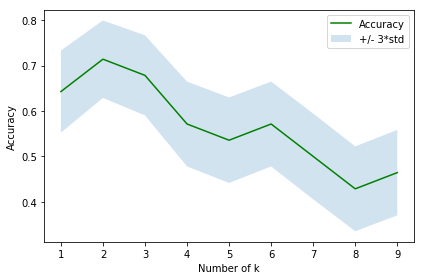

In [169]:
plt.plot(range(1,k_val),mean_acc,'g')
plt.fill_between(range(1,k_val),mean_acc-1 * std_acc,mean_acc+1*std_acc,alpha=0.2)
plt.legend(('Accuracy','+/- 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of k')
plt.tight_layout()
plt.savefig('accplotKNN.png',dpi=500)
plt.show()


In [170]:
KNNmodel = KNeighborsClassifier(n_neighbors = BestK).fit(X_train,y_train)
yhat1 = KNNmodel.predict(X_test)
model_scores = {}
jaccard_1 = jaccard_similarity_score(y_test,yhat1)
f1_1 = f1_score(y_test, yhat1, average = 'weighted')
yhat_prob_1 = KNNmodel.predict_proba(X_test)
logloss_1 = log_loss(y_test,yhat_prob_1)
cnfmatrix1 = confusion_matrix(y_test,yhat1)
scores1 = cross_val_score(KNNmodel,X,Y,cv=5)
print(scores1.mean())
print (cnfmatrix1)
print(classification_report(y_test, yhat1))

0.5924297924297924
[[12  4]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.67      0.67      0.67        12

   micro avg       0.71      0.71      0.71        28
   macro avg       0.71      0.71      0.71        28
weighted avg       0.71      0.71      0.71        28



Confusion Matrix without normalization
[[12  4]
 [ 4  8]]


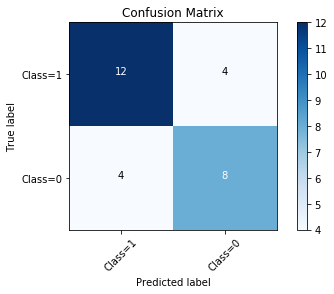

In [171]:
plot_confusion_matrix(cnfmatrix1,"KNN_CF",classes=['Class=1','Class=0'],normalize=False)

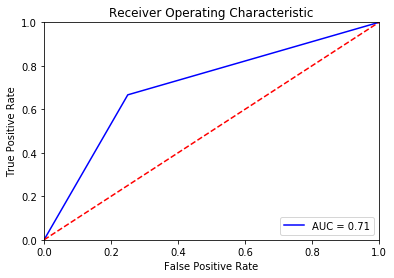

In [172]:
# calculate the fpr and tpr for all thresholds of the classification
preds = yhat_prob_1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC KNN",dpi=500)
plt.show()

<b>With KNN, best accuracy obtained was  with k = </b>

## Decision Tree Classification

Highest Classification Accuracy 0.7857142857142857
Best depth value 16


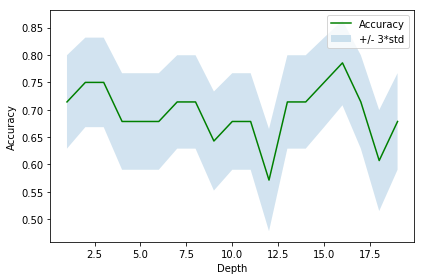

In [115]:
depth = 20
mean_acc = np.zeros(depth-1)
std_acc = np.zeros(depth-1)
for n in range(1,depth):
    DTmodel = DecisionTreeClassifier(criterion="entropy",max_depth=depth).fit(X_train,y_train)
    yhat0 = DTmodel.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat0)
    std_acc[n-1] = np.std(yhat0==y_test)/np.sqrt(yhat0.shape[0])
print("Highest Classification Accuracy {}".format(mean_acc.max()))
print("Best depth value {}".format(mean_acc.argmax()+1))
bestDepth = mean_acc.argmax()+1

plt.plot(range(1,depth),mean_acc,'g')
plt.fill_between(range(1,depth),mean_acc-1 * std_acc,mean_acc+1*std_acc,alpha=0.2)
plt.legend(('Accuracy','+/- 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.savefig("accplotDT.png",dpi=500)
plt.show()

In [116]:
DTmodel = DecisionTreeClassifier(criterion="entropy",max_depth=bestDepth).fit(X_train,y_train)
yhat0 = DTmodel.predict(X_test)
jaccard_0 = jaccard_similarity_score(y_test,yhat0)
f1_0 = f1_score(y_test, yhat0, average = 'weighted')
yhat_prob_0 = DTmodel.predict_proba(X_test)
logloss_0 = log_loss(y_test,yhat_prob_0)
cnfmatrix0 = confusion_matrix(y_test,yhat0)
scores0 = cross_val_score(DTmodel,X,Y,cv=5)
print("Cross Validation Score {}".format(scores0.mean()))
print (cnfmatrix0)
print(classification_report(y_test, yhat0))



Cross Validation Score 0.6495522995522995
[[9 7]
 [3 9]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.56      0.75      0.64        12

   micro avg       0.64      0.64      0.64        28
   macro avg       0.66      0.66      0.64        28
weighted avg       0.67      0.64      0.64        28



Confusion Matrix without normalization
[[9 7]
 [3 9]]


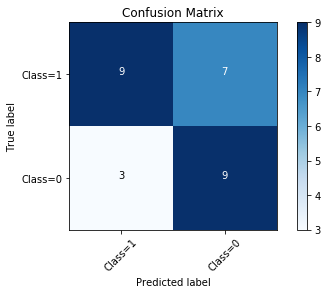

In [117]:
plot_confusion_matrix(cnfmatrix0,"DT_CF",classes=['Class=1','Class=0'],normalize=False)

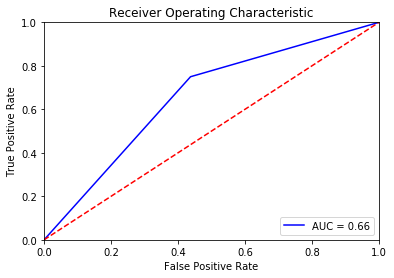

In [118]:
# calculate the fpr and tpr for all thresholds of the classification
preds = yhat_prob_0[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat0)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC DT",dpi=500)
plt.show()

## Random Forest Classifier

Highest Classification Accuracy 0.75
Best n value 9


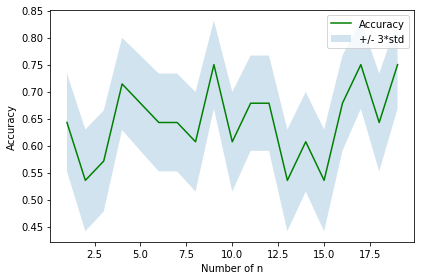

In [175]:
n_val = 20
mean_acc = np.zeros(n_val-1)
std_acc = np.zeros(n_val-1)
for n in range(1,n_val):
    RFmodel = RandomForestClassifier(n_estimators = n).fit(X_train,y_train)
    yhat2 = RFmodel.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat2)
    std_acc[n-1] = np.std(yhat2==y_test)/np.sqrt(yhat2.shape[0])
print("Highest Classification Accuracy {}".format(mean_acc.max()))
print("Best n value {}".format(mean_acc.argmax()+1))

BestN = mean_acc.argmax()+1

plt.plot(range(1,n_val),mean_acc,'g')
plt.fill_between(range(1,n_val),mean_acc-1 * std_acc,mean_acc+1*std_acc,alpha=0.2)
plt.legend(('Accuracy','+/- 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of n')
plt.tight_layout()
plt.savefig("accplotRF.png",dpi=500)
plt.show()


In [187]:
RFmodel = RandomForestClassifier(n_estimators = BestN).fit(X_train,y_train)
yhat2 = RFmodel.predict(X_test)
jaccard_2 = jaccard_similarity_score(y_test,yhat2)
f1_2 = f1_score(y_test, yhat2, average = 'weighted')
yhat_prob_2 = RFmodel.predict_proba(X_test)
logloss_2 = log_loss(y_test,yhat_prob_2)
cnfmatrix2 = confusion_matrix(y_test,yhat2)
scores2 = cross_val_score(RFmodel,X,Y,cv=5)
print(scores2.mean())
print(jaccard_2)
print (cnfmatrix2)
print(classification_report(y_test, yhat2))

0.6951363451363453
0.8214285714285714
[[13  3]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.77      0.83      0.80        12

   micro avg       0.82      0.82      0.82        28
   macro avg       0.82      0.82      0.82        28
weighted avg       0.82      0.82      0.82        28



Confusion Matrix without normalization
[[13  3]
 [ 2 10]]


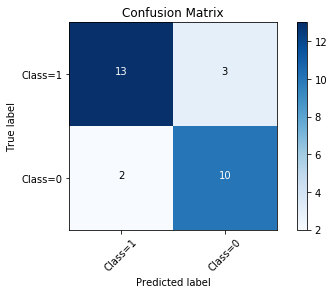

In [188]:
plot_confusion_matrix(cnfmatrix2,"RF_CF",classes=['Class=1','Class=0'],normalize=False)

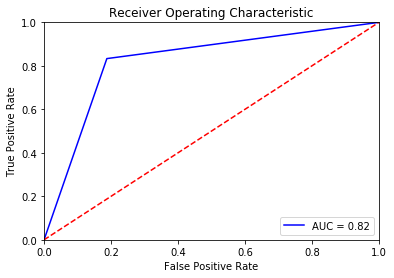

In [189]:
# calculate the fpr and tpr for all thresholds of the classification
preds = yhat_prob_2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROCRF.png",dpi=500)
plt.show()

<b>Due to its random nature, this classifier returns very variable results

## Logistic Regression

In [44]:
C_val = np.arange(0.1,30,0.1)
mean_acc = list()
for n in C_val:
    LRModel = LogisticRegression(C= n,solver = 'liblinear').fit(X_train,y_train)
    yhat4 = LRModel.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test,yhat4))
    max_value = max(mean_acc)
    max_index = mean_acc.index(max_value)
print("Best C value {}".format(max_index/10))
print("Best Classification Accuracy {}".format(max(mean_acc)))
BestC = max_index/10

Best C value 10.0
Best Classification Accuracy 0.6785714285714286


In [45]:
LRmodel = LogisticRegression(C= max_index/10,solver = 'liblinear').fit(X_train,y_train)
yhat4 = LRModel.predict(X_test)

In [46]:
jaccard_4 = jaccard_similarity_score(y_test,yhat4)
f1_4 = f1_score(y_test, yhat4, average = 'weighted')
yhat_prob_4 = LRmodel.predict_proba(X_test)
logloss_4 = log_loss(y_test,yhat_prob_4)
cnfmatrix4 = confusion_matrix(y_test,yhat4)
scores4 = cross_val_score(LRmodel,X,Y,cv=5)
print(scores4.mean())
print(jaccard_4)
print(logloss_4)
print (cnfmatrix4)
print(classification_report(y_test, yhat4))

0.6495522995522995
0.6428571428571429
0.6647707784861759
[[12  4]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.60      0.50      0.55        12

   micro avg       0.64      0.64      0.64        28
   macro avg       0.63      0.62      0.63        28
weighted avg       0.64      0.64      0.64        28



Confusion Matrix without normalization
[[12  4]
 [ 6  6]]


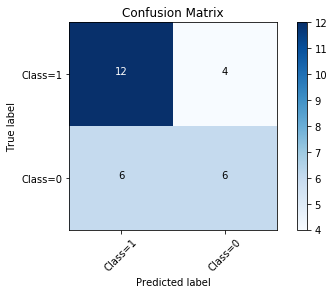

In [47]:
plot_confusion_matrix(cnfmatrix4,"LR_CM",classes=['Class=1','Class=0'],normalize=False)

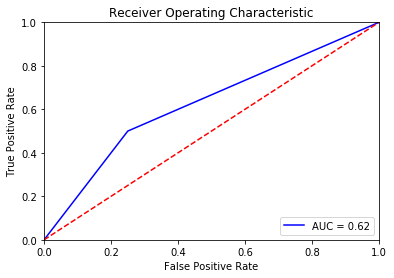

In [48]:
# calculate the fpr and tpr for all thresholds of the classification
preds = yhat_prob_4[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat4)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_LR.png",dpi=500)
plt.show()

## Evaluation of Classification Models

In [190]:
scores = {"Algorithm":["KNN","Random Forests","Decision Tree","Logistic Regression"],
          "Jaccard Index":[jaccard_1,jaccard_2,jaccard_0,jaccard_4],
          "F1 Score":[f1_1,f1_2,f1_0,f1_4],
          "Logloss":[logloss_1,logloss_2,logloss_0,logloss_4],
          "Cross Val Score":[scores1.mean(),scores2.mean(),scores0.mean(),scores4.mean()]
         }
scoresDf = pd.DataFrame(scores)

In [191]:
scoresDf

,Algorithm,Jaccard Index,F1 Score,Logloss,Cross Val Score
0,KNN,0.714286,0.714286,7.623964,0.592430
1,Random Forests,0.821429,0.822120,0.575979,0.695136
2,Decision Tree,0.642857,0.642857,12.335277,0.649552
3,Logistic Regression,0.642857,0.637128,0.664771,0.649552


<b>Logistic Regression appears to be the superior model displaying highest accuracy, lowest logloss and lowest rate of false positives.<br>
For the purpose of this exercie a model that results in low false positives is desirable

## Prediction for the midlands using best model

In [126]:
dfMidlandsTest = dfMidlands.iloc[:,1:319]

In [127]:
dfMidlandsTest.shape

(22, 318)

In [128]:
dfMidlandsTest.head()

,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,Argentinian Restaurant,...,University,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0


In [129]:
X_test.shape

(28, 318)

In [130]:
dfLondonTest = dfLondon.iloc[:,1:319]

In [131]:
londoncols = []
midlandscols = []
missing =[]
for i in dfMidlandsTest.columns:
    midlandscols.append(i)
for y in dfLondonTest.columns:
    londoncols.append(y)
    if y not in midlandscols:
        missing.append(y)


In [132]:
dfMidlandsTest.shape

(22, 318)

In [133]:
dfLondonTest.shape

(137, 318)

In [134]:
dfLondonTest.head()

,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,Argentinian Restaurant,...,University,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
KNNPred = KNNmodel.predict(dfMidlandsTest)

In [136]:
dfMidlands["KNNPred"] = KNNPred

In [137]:
RFPred = RFmodel.predict(dfMidlandsTest)

In [50]:
dfMidlands["RFPred"] = RFPred

NameError: name 'RFPred' is not defined

In [139]:
LRPred = LRmodel.predict(dfMidlandsTest)

In [140]:
dfMidlands["LRPred"] = LRPred

In [141]:
DTPred = DTmodel.predict(dfMidlandsTest)

In [142]:
dfMidlands["DTPred"] = DTPred

In [143]:
dfMidlands.sort_values(by="nCoffeeFrq",ascending=False).head()

,Postcode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,PostLat,PostLong,Town,KNNPred,RFPred,LRPred,DTPred,RF2Pred,LR2Pred,DT2Pred
81,b25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,52.461833,-1.816381,birmingham,0,1,1,1,1,1,0
214,dy06,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,...,52.475495,-2.112737,kingswinford,0,1,0,1,1,0,0
227,dy5,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,...,52.475495,-2.112737,brierley hill,0,1,0,1,1,0,0
146,b73,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,52.551370,-1.846894,sutton coldfield,0,0,0,1,1,0,0
3905,ws1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,52.485704,-1.885294,walsall,0,1,0,1,1,0,0


## Display best location on map

In [144]:
from geopy.geocoders import Nominatim
address = 'Birmingham, United Kingdom'
geolocator = Nominatim(user_agent="UK_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Birmingham, United Kingdom are 52.4775396, -1.894053.


In [145]:
dfFinal = dfMidlands.merge(df4,on="Postcode",how="left")

In [146]:
dfFinal.shape[1]

345

In [147]:
for col in dfFinal.columns[1:322]:
    dfFinal.drop(columns=col ,inplace=True)

In [148]:
dfFinal.head()

,Postcode,Yoga Studio,venCount,Coffee,nCoffeeFrq,PostLat_x,PostLong_x,Town_x,KNNPred,RFPred,...,DT2Pred,Unnamed: 0,PostLat_y,PostLong_y,Town_y,Venue,VenueLat,VenueLong,VenueId,VenueCategory
0,b12,0.0,15,0.08,0.005333,52.471547,-1.884705,birmingham,0,0,...,0,29,52.471547,-1.884705,birmingham,The Spotted Dog,52.473508,-1.883124,4b2be420f964a52023bd24e3,Pub
1,b12,0.0,15,0.08,0.005333,52.471547,-1.884705,birmingham,0,0,...,0,30,52.471547,-1.884705,birmingham,Digbeth Dining Club,52.475269,-1.882408,51d70128498ef30e94e9f569,Food Truck
2,b12,0.0,15,0.08,0.005333,52.471547,-1.884705,birmingham,0,0,...,0,31,52.471547,-1.884705,birmingham,Clink Beer,52.475099,-1.884005,57892d6b498e14e137409901,Beer Store
3,b12,0.0,15,0.08,0.005333,52.471547,-1.884705,birmingham,0,0,...,0,32,52.471547,-1.884705,birmingham,Mockingbird Cinema & Bar,52.475309,-1.884231,53dbd13e498ebd9e5f2aa859,Indie Movie Theater
4,b12,0.0,15,0.08,0.005333,52.471547,-1.884705,birmingham,0,0,...,0,33,52.471547,-1.884705,birmingham,Custard Factory & Zellig,52.475261,-1.883911,4b05882bf964a52014b622e3,Coworking Space


In [149]:
for col in dfFinal.columns[7:]:
    dfFinal.drop(columns=col,inplace=True)

In [150]:
dfFinal = dfFinal.drop_duplicates()

In [151]:
dfFinal.shape

(22, 7)

In [152]:
def generateMap(predModel):
    #generate map
    midlands_map = folium.Map(location=[latitude,longitude], zoom_start=10)
    #add location to map
    folium.features.CircleMarker(
        [latitude,longitude],
        radius = 1,
        color = 'red',
        #popup='Search Location',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(midlands_map)
    # add cafes to map
    for lat,lng,label in zip(dfFinal.PostLat_x,dfFinal.PostLong_x,predModel):
        if label == 1:
            folium.features.CircleMarker(
            [lat,lng],
            radius=10,
            color='blue',
            popup = "Good location for a cafe",
            fill=True
            #full_opacity=0.6,
            ).add_to(midlands_map)
        else:
            folium.features.CircleMarker(
            [lat,lng],
            radius=10,
            color='red',
            popup = "Bad location for a cafe",
            fill=True,
            #full_opacity=0.6,
            ).add_to(midlands_map)
    
    return midlands_map

In [49]:
dfMidlands

,Postcode,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Arcade,...,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,venCount,Coffee,nCoffeeFrq,PostLat,PostLong,Town
6,b12,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,15,0.080000,0.005333,52.471547,-1.884705,birmingham
31,b15,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,14,0.111111,0.007937,52.470055,-1.901906,birmingham
49,b16,0.0,0.0,0.000000,0.0,0.0,0.000000,0.045455,0.0,0.0,...,0.0,0.000000,0.0,0.0,15,0.136364,0.009091,52.477317,-1.921355,birmingham
81,b25,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,7,0.125000,0.017857,52.461833,-1.816381,birmingham
93,b27,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,10,0.100000,0.010000,52.446764,-1.824344,birmingham
103,b40,0.0,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,20,0.133333,0.006667,52.453963,-1.727600,birmingham
133,b42,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,9,0.111111,0.012346,52.527202,-1.896927,birmingham
146,b73,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,6,0.100000,0.016667,52.551370,-1.846894,sutton coldfield
156,b90,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,10,0.100000,0.010000,52.396129,-1.818399,solihull
166,b91,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.033333,0.0,0.0,22,0.100000,0.004545,52.413775,-1.784169,solihull


In [154]:
# Use all training data for Random Forest Model
RFmodel2 = RandomForestClassifier(n_estimators = BestN).fit(X,Y)
yhat5 = RFmodel2.predict(dfMidlandsTest)
scores5 = cross_val_score(RFmodel2,X,Y,cv=5)
print(scores5.mean())

0.5707570207570207


In [155]:
# Use all training data for Logistic Regression Model
LRmodel2 = LogisticRegression(C= BestC,solver = 'liblinear').fit(X,Y)
yhat6 = LRModel.predict(dfMidlandsTest)
scores6 = cross_val_score(LRmodel2,X,Y,cv=5)
print(scores6.mean())

0.6495522995522995


In [156]:
# Use all training data for Decision Tree Model
DTmodel2 = DecisionTreeClassifier(criterion="entropy",max_depth=bestDepth).fit(X_train,y_train)
yhat7 = DTmodel2.predict(dfMidlandsTest)
scores7 = cross_val_score(DTmodel2,X,Y,cv=5)
print(scores7.mean())

0.6487382987382987


In [157]:
dfMidlands["RF2Pred"] = yhat5

In [158]:
dfMidlands["LR2Pred"] = yhat6

In [159]:
dfMidlands["DT2Pred"] = yhat7

In [162]:
generateMap(dfMidlands.RFPred)

In [164]:
generateMap(dfMidlands.RF2Pred)

In [201]:
#dfMidlands[["Postcode","nCoffeeFrq","KNNPred","RFPred","RF2Pred","LRPred","LR2Pred","DT2Pred","DTPred"]].sort_values(by="nCoffeeFrq",ascending=False)